In [1]:
import osmnx as ox
import random
import lib
import numpy as np
from clustering import *

In [2]:
G = lib.load()
allHouses, allInfra = lib.getTaggedNodes(G)

In [3]:
# params
speed = 40 # km/h
maxTime = 20
maxDistance = 2000

houses = random.sample(allHouses, 100)
infra = random.choice(allInfra)

In [4]:
houses_coords = np.array([(G.nodes[h]['y'], G.nodes[h]['x']) for h in houses])
dist_matrix = np.array([[get_distance(p[0], p[1], pp[0], pp[1]) for pp in houses_coords] for p in houses_coords])

C:\Users\Kuorell\anaconda3\envs\ox\lib\site-packages\sklearn\cluster\_agglomerative.py:468: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


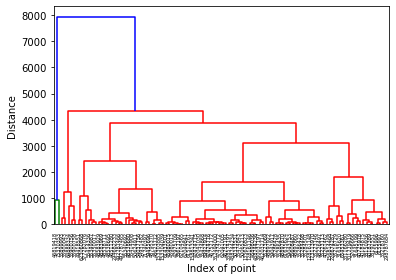

In [5]:
# 2.2)
plot_dendrogram(dist_matrix, labels=houses, truncate_mode='level')

k= 2!!!
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
2.3 a)
2.3 c, d)
centroid: 158813341, paths len= 864985.654, tree weight= 154480.80299999993
2.3 a)
2.3 c, d)
centroid: 75370353, paths len= 10943.444000000001, tree weight= 10943.444000000001
2.3 b)
infra : 161270069, paths len= 39089.989000000016, tree weight= 34837.431000000004


C:\Users\Kuorell\anaconda3\envs\ox\lib\site-packages\sklearn\cluster\_agglomerative.py:468: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


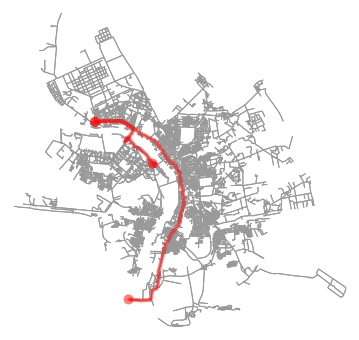




k= 3!!!
[0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
2.3 a)
2.3 c, d)
centroid: 128161148, paths len= 674437.9000000001, tree weight= 144230.98099999994
2.3 a)
2.3 c, d)
centroid: 75370353, paths len= 10943.444000000001, tree weight= 10943.444000000001
2.3 a)
2.3 c, d)
centroid: 35900756, paths len= 18957.034000000007, tree weight= 17991.49600000001
2.3 b)


C:\Users\Kuorell\anaconda3\envs\ox\lib\site-packages\sklearn\cluster\_agglomerative.py:468: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


infra : 161270069, paths len= 57063.394000000015, tree weight= 39952.84200000001


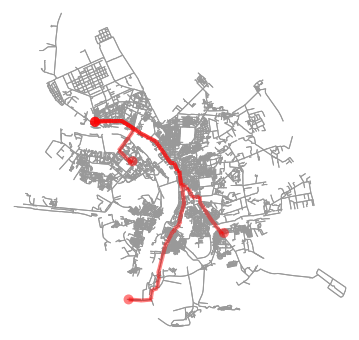




k= 5!!!
[1 0 4 0 0 4 0 0 4 2 4 4 4 4 4 0 4 1 1 4 0 4 4 4 2 0 4 4 4 0 4 1 1 4 1 4 4
 4 1 4 1 0 0 4 1 2 4 0 0 4 0 0 2 4 2 0 4 1 1 0 0 4 0 0 0 4 1 4 4 1 4 4 1 1
 4 4 0 4 4 0 4 4 4 1 4 3 1 4 4 1 4 0 0 4 0 1 3 4 4 4]
2.3 a)
2.3 c, d)
centroid: 55340692, paths len= 142051.74599999998, tree weight= 40205.71499999998
2.3 a)
2.3 c, d)
centroid: 35218160, paths len= 116821.91599999997, tree weight= 46250.49900000001
2.3 a)
2.3 c, d)


C:\Users\Kuorell\anaconda3\envs\ox\lib\site-packages\sklearn\cluster\_agglomerative.py:468: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


centroid: 35900756, paths len= 18957.034000000007, tree weight= 17991.49600000001
2.3 a)
2.3 c, d)
centroid: 75370353, paths len= 10943.444000000001, tree weight= 10943.444000000001
2.3 a)
2.3 c, d)
centroid: 47474775, paths len= 230367.752, tree weight= 64049.75300000002
2.3 b)
infra : 161270069, paths len= 79163.23800000001, tree weight= 44198.73800000001


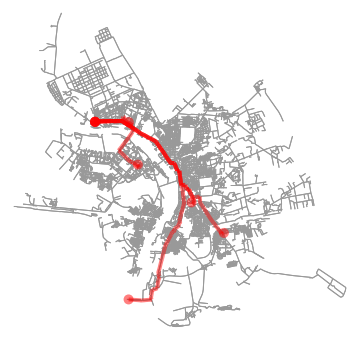

In [6]:
for k in [2, 3, 5]:
    print(f"k= {k}!!!")
    model = get_clusters(dist_matrix, k=k)
    print(model.labels_)
    centroids = []
    for c in range(k):
        # 2.3 a)
        print(f"2.3 a)")
        cluster_coords = houses_coords[model.labels_ == c]
        cluster = np.array(houses)[model.labels_ == c]
        centroids.append(cluster[get_centroid(cluster_coords)])
        # 2.3 c,d)
        print(f"2.3 c, d)")
        routes = lib.getFromSingleToManyPaths(G, centroids[-1], cluster, speed)
        paths_length = sum(route['length'] for route in routes.values())
        routes = [route['route'] for route in routes.values()]
        tree = lib.routes_to_tree(G, routes)
        print(f"centroid: {centroids[-1]}, paths len= {paths_length}, tree weight= {tree['weight']}")
    # 2.3 b)
    print(f"2.3 b)")
    routes = lib.getFromSingleToManyPaths(G, infra, centroids, speed)
    paths_length = sum(route['length'] for route in routes.values())
    routes = [route['route'] for route in routes.values()]
    tree = lib.routes_to_tree(G, routes)
    print(f"infra : {infra}, paths len= {paths_length}, tree weight= {tree['weight']}")

    ox.plot_graph_routes(G, routes, node_size=0)
    print(f"\n\n")